In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv ('bantul.csv')
df

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
0,4.950000e+08,Banguntapan,3.0,1.0,50.0,76.0,1.0,SHM,1300.0,1.0,2022.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000e+08,Sewon,NaN,NaN,176.0,63.0,NaN,HGB,NaN,1.0,NaN
3,2.500000e+09,Sewon,6.0,4.0,354.0,250.0,2.0,SHM,4400.0,1.0,NaN
4,2.000000e+08,Banguntapan,4.0,3.0,113.0,140.0,2.0,SHM,1300.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2103,5.500000e+08,Sewon,2.0,1.0,87.0,45.0,NaN,SHM,1300.0,1.0,NaN
2104,9.500000e+08,Sewon,3.0,1.0,208.0,80.0,1.0,SHM,1300.0,1.0,NaN
2105,1.100000e+09,Kasihan,3.0,3.0,212.0,80.0,4.0,SHM,2200.0,NaN,NaN
2106,4.950000e+08,Banguntapan,3.0,2.0,70.0,55.0,NaN,SHM,1300.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HARGA       2100 non-null   float64
 1   ALAMAT      2100 non-null   object 
 2   K_TIDUR     2035 non-null   float64
 3   K_MANDI     2030 non-null   float64
 4   L_TANAH     2045 non-null   float64
 5   L_BANGUNAN  2045 non-null   float64
 6   CARPORT     1528 non-null   float64
 7   SERTIFIKAT  2041 non-null   object 
 8   LISTRIK     1805 non-null   float64
 9   LANTAI      1883 non-null   float64
 10  TAHUN       1311 non-null   float64
dtypes: float64(9), object(2)
memory usage: 181.3+ KB


In [4]:
df = df.drop(labels=[5], axis=0)

In [5]:
df['HARGA']= df['HARGA'].astype(float)/10**6
df

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
0,495.0,Banguntapan,3.0,1.0,50.0,76.0,1.0,SHM,1300.0,1.0,2022.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,Sewon,NaN,NaN,176.0,63.0,NaN,HGB,NaN,1.0,NaN
3,2500.0,Sewon,6.0,4.0,354.0,250.0,2.0,SHM,4400.0,1.0,NaN
4,200.0,Banguntapan,4.0,3.0,113.0,140.0,2.0,SHM,1300.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2103,550.0,Sewon,2.0,1.0,87.0,45.0,NaN,SHM,1300.0,1.0,NaN
2104,950.0,Sewon,3.0,1.0,208.0,80.0,1.0,SHM,1300.0,1.0,NaN
2105,1100.0,Kasihan,3.0,3.0,212.0,80.0,4.0,SHM,2200.0,NaN,NaN
2106,495.0,Banguntapan,3.0,2.0,70.0,55.0,NaN,SHM,1300.0,NaN,NaN


In [6]:
df.describe()

,HARGA,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,LISTRIK,LANTAI,TAHUN
count,2099.000000,2034.000000,2029.000000,2044.000000,2044.000000,1527.000000,1805.000000,1882.000000,1311.000000
mean,869.193902,3.025565,2.037950,135.267123,114.311155,1.429601,1726.310249,1.300744,2020.599542
std,1265.418545,2.351196,2.370729,158.497238,891.386236,4.394398,1347.175708,0.503987,3.194552
min,100.000000,1.000000,1.000000,30.000000,30.000000,1.000000,450.000000,1.000000,1989.000000
25%,372.000000,2.000000,1.000000,75.000000,43.000000,1.000000,1300.000000,1.000000,2020.000000
50%,510.000000,2.000000,1.000000,92.500000,60.000000,1.000000,1300.000000,1.000000,2022.000000
75%,890.000000,3.000000,2.000000,120.000000,100.000000,1.000000,2200.000000,2.000000,2022.000000
max,22500.000000,32.000000,32.000000,1850.000000,40145.000000,99.000000,24000.000000,4.000000,2023.000000


In [7]:
df

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
0,495.0,Banguntapan,3.0,1.0,50.0,76.0,1.0,SHM,1300.0,1.0,2022.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,Sewon,NaN,NaN,176.0,63.0,NaN,HGB,NaN,1.0,NaN
3,2500.0,Sewon,6.0,4.0,354.0,250.0,2.0,SHM,4400.0,1.0,NaN
4,200.0,Banguntapan,4.0,3.0,113.0,140.0,2.0,SHM,1300.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2103,550.0,Sewon,2.0,1.0,87.0,45.0,NaN,SHM,1300.0,1.0,NaN
2104,950.0,Sewon,3.0,1.0,208.0,80.0,1.0,SHM,1300.0,1.0,NaN
2105,1100.0,Kasihan,3.0,3.0,212.0,80.0,4.0,SHM,2200.0,NaN,NaN
2106,495.0,Banguntapan,3.0,2.0,70.0,55.0,NaN,SHM,1300.0,NaN,NaN


In [8]:
df[['CARPORT','SERTIFIKAT']]= df[['CARPORT','SERTIFIKAT']].fillna(method="ffill")
df[['LISTRIK','TAHUN']]= df[['LISTRIK','TAHUN']].fillna(method="pad")
df = df.dropna()
df

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
0,495.0,Banguntapan,3.0,1.0,50.0,76.0,1.0,SHM,1300.0,1.0,2022.0
3,2500.0,Sewon,6.0,4.0,354.0,250.0,2.0,SHM,4400.0,1.0,2022.0
4,200.0,Banguntapan,4.0,3.0,113.0,140.0,2.0,SHM,1300.0,2.0,2022.0
6,4750.0,Banguntapan,7.0,6.0,730.0,450.0,1.0,SHM,2200.0,1.0,2018.0
7,1390.0,Sewon,12.0,12.0,150.0,380.0,1.0,SHM,2200.0,3.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
2098,225.0,Pajangan,2.0,1.0,75.0,42.0,1.0,SHM,1300.0,1.0,2020.0
2100,650.0,Piyungan,2.0,1.0,108.0,55.0,1.0,SHM,1300.0,1.0,2021.0
2102,360.0,Bantul,2.0,1.0,75.0,45.0,1.0,SHM,1300.0,1.0,2020.0
2103,550.0,Sewon,2.0,1.0,87.0,45.0,1.0,SHM,1300.0,1.0,2020.0


In [9]:
Q1 = df['HARGA'].quantile(0.25)
Q3 = df['HARGA'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df = df[df['HARGA'] <= upper_bound]

In [10]:
df = df.reset_index(drop=True)
df

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
0,495.0,Banguntapan,3.0,1.0,50.0,76.0,1.0,SHM,1300.0,1.0,2022.0
1,200.0,Banguntapan,4.0,3.0,113.0,140.0,2.0,SHM,1300.0,2.0,2022.0
2,1390.0,Sewon,12.0,12.0,150.0,380.0,1.0,SHM,2200.0,3.0,2018.0
3,275.0,Sedayu,2.0,1.0,70.0,36.0,1.0,SHM,1300.0,1.0,2022.0
4,695.0,Kasihan,2.0,2.0,105.0,60.0,1.0,SHM,1300.0,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...
1678,225.0,Pajangan,2.0,1.0,75.0,42.0,1.0,SHM,1300.0,1.0,2020.0
1679,650.0,Piyungan,2.0,1.0,108.0,55.0,1.0,SHM,1300.0,1.0,2021.0
1680,360.0,Bantul,2.0,1.0,75.0,45.0,1.0,SHM,1300.0,1.0,2020.0
1681,550.0,Sewon,2.0,1.0,87.0,45.0,1.0,SHM,1300.0,1.0,2020.0


In [11]:
ratings = {
    "Kasihan": 4,
    "Banguntapan": 4,
    "Sewon": 4,
    "Bantul": 3,
    "Pajangan": 3,
    "Piyungan": 3,
    "Sedayu": 3,
    "Pandak": 3,
    "Pundong": 3,
    "Jetis": 2,
    "Pleret": 2,
    "Bambanglipuro": 1,
    "Sanden": 1,
    "Srandakan": 1,
    "Imogiri": 1,
    "Kretek": 1,
    "Dlingo": 1
}

# Fungsi untuk mengganti alamat dengan rating
def rating_alamat(address):
    return ratings.get(address, None)

# Mengganti alamat dengan rating menggunakan .apply dan .loc
df.loc[:, 'ALAMAT'] = df['ALAMAT'].map(rating_alamat)
df['ALAMAT'] = df['ALAMAT'].astype(float)

In [12]:
df.loc[:, 'SERTIFIKAT'] = df['SERTIFIKAT'].str.strip()
label_map = {'SHM': 1, 'HGB': 0}
df.loc[:, 'SERTIFIKAT'] = df['SERTIFIKAT'].map(label_map)
df['SERTIFIKAT'] = df['SERTIFIKAT'].astype(float)
df = df.dropna()

In [13]:
filtered_df = df[(df["HARGA"] >= 100) & (df["HARGA"] <= 1500)] 
filtered_df = df[(df["L_TANAH"] >= 50) & (df["L_TANAH"] <= 350)]
df = filtered_df


In [14]:
df.describe()

,HARGA,ALAMAT,K_TIDUR,K_MANDI,L_TANAH,L_BANGUNAN,CARPORT,SERTIFIKAT,LISTRIK,LANTAI,TAHUN
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,552.964750,3.547310,2.588126,1.568955,102.909091,69.931354,1.353123,0.927644,1534.632035,1.257885,2020.902288
std,280.682342,0.575183,1.119055,1.120401,53.185027,49.332759,4.249299,0.259157,921.175733,0.490921,2.660278
min,100.000000,1.000000,1.000000,1.000000,50.000000,30.000000,1.000000,0.000000,900.000000,1.000000,1992.000000
25%,359.000000,3.000000,2.000000,1.000000,75.000000,40.000000,1.000000,1.000000,1300.000000,1.000000,2021.000000
50%,475.000000,4.000000,2.000000,1.000000,88.000000,50.000000,1.000000,1.000000,1300.000000,1.000000,2022.000000
75%,750.000000,4.000000,3.000000,2.000000,107.000000,78.000000,1.000000,1.000000,1300.000000,1.000000,2022.000000
max,1500.000000,4.000000,20.000000,20.000000,350.000000,400.000000,99.000000,1.000000,24000.000000,4.000000,2023.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 0 to 1682
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HARGA       1617 non-null   float64
 1   ALAMAT      1617 non-null   float64
 2   K_TIDUR     1617 non-null   float64
 3   K_MANDI     1617 non-null   float64
 4   L_TANAH     1617 non-null   float64
 5   L_BANGUNAN  1617 non-null   float64
 6   CARPORT     1617 non-null   float64
 7   SERTIFIKAT  1617 non-null   float64
 8   LISTRIK     1617 non-null   float64
 9   LANTAI      1617 non-null   float64
 10  TAHUN       1617 non-null   float64
dtypes: float64(11)
memory usage: 151.6 KB


In [16]:
correlation_matrix = df.corr(method='pearson')

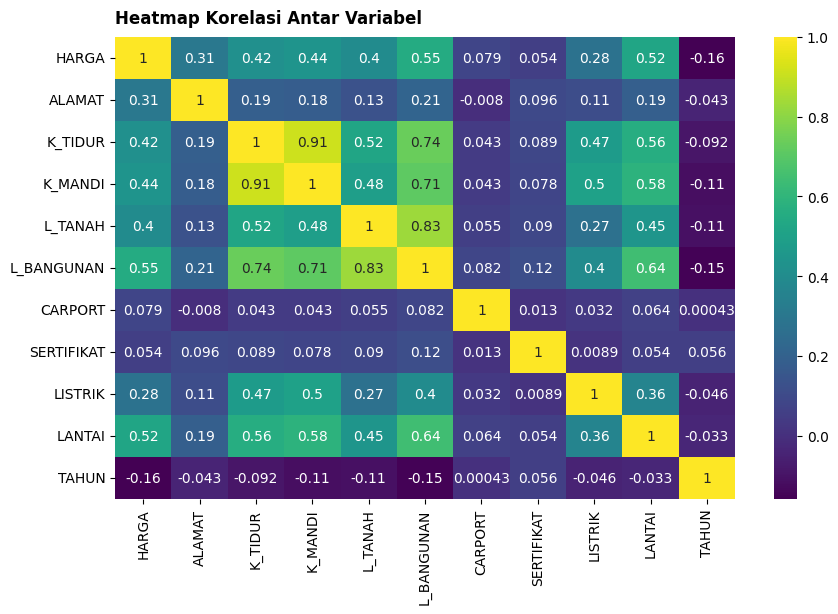

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap Korelasi Antar Variabel', fontweight='bold', pad=10, loc='left')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 0 to 1682
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HARGA       1617 non-null   float64
 1   ALAMAT      1617 non-null   float64
 2   K_TIDUR     1617 non-null   float64
 3   K_MANDI     1617 non-null   float64
 4   L_TANAH     1617 non-null   float64
 5   L_BANGUNAN  1617 non-null   float64
 6   CARPORT     1617 non-null   float64
 7   SERTIFIKAT  1617 non-null   float64
 8   LISTRIK     1617 non-null   float64
 9   LANTAI      1617 non-null   float64
 10  TAHUN       1617 non-null   float64
dtypes: float64(11)
memory usage: 151.6 KB


In [19]:
X = df[['ALAMAT', 'L_TANAH', 'L_BANGUNAN', 'K_TIDUR', 'K_MANDI', 'LANTAI']]
y = df['HARGA']

# Definisikan jumlah lipatan untuk cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop melalui setiap lipatan
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Split setiap lipatan menjadi 80-20 (data training-data testing)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Fungsi untuk membuat parameter C berdasarkan kernel
def get_param_grid(kernel):
    param_grid = {'C': [10,20,30,40,50]}
    
    return param_grid

# Grid Search dan mendapatkan parameter terbaik
def get_best_params(X_train, y_train, kernel):
    svr = SVR(kernel=kernel)
    param_grid = get_param_grid(kernel)

    grid_search = GridSearchCV(svr, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    
    return best_params
best_params_list = []   
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    best_params = get_best_params(X_train, y_train, kernel)
    best_params_list.append({'Kernel': kernel.upper(), 'C': best_params['C']})

# Menampilkan hasil dalam bentuk tabel
result_df = pd.DataFrame(best_params_list)
result_df

,Kernel,C
0,LINEAR,10
1,RBF,50
2,POLY,20


In [22]:
#Pelatihan Model
#Linear
svr_rbf = SVR(kernel='rbf', C=result_df.loc[result_df['Kernel'] == 'RBF', 'C'].values[0])
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

#RBF
svr_linear = SVR(kernel='linear', C=result_df.loc[result_df['Kernel'] == 'LINEAR', 'C'].values[0])
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)

#Poly
svr_poly = SVR(kernel='poly', C=result_df.loc[result_df['Kernel'] == 'POLY', 'C'].values[0])
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)

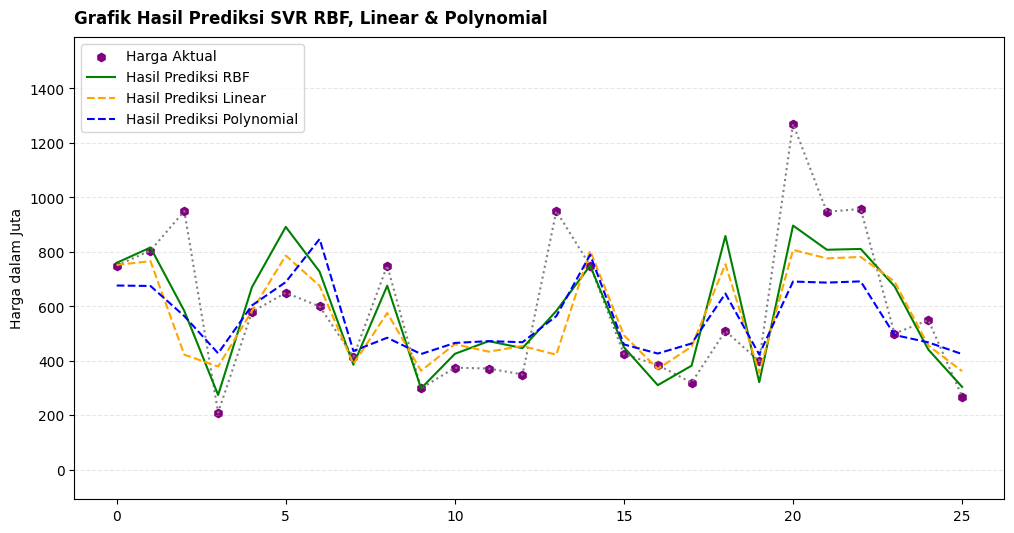

In [23]:
# Ambil nilai C terbaik untuk masing-masing kernel dari result_df
best_c_rbf = result_df[result_df['Kernel'] == 'RBF']['C'].values[0]
best_c_linear = result_df[result_df['Kernel'] == 'LINEAR']['C'].values[0]
best_c_poly = result_df[result_df['Kernel'] == 'POLY']['C'].values[0]

# Mengambil subset data untuk 25 data teratas
subset_y_test = y_test.head(26)
subset_y_pred_rbf = y_pred_rbf[:26]
subset_y_pred_linear = y_pred_linear[:26]
subset_y_pred_poly = y_pred_poly[:26] 

#Size
plt.figure(figsize=(12, 6))

# TAMPILHARGA AKTUAL
plt.scatter(range(len(subset_y_test)), subset_y_test.values, label='Harga Aktual', color='purple', marker='h')
plt.plot(subset_y_test.values, color='gray', linestyle=':')

# Tampil Model Prediksi
plt.plot(subset_y_pred_rbf, label='Hasil Prediksi RBF', color='green',)
plt.plot(subset_y_pred_linear, label='Hasil Prediksi Linear', color='orange', linestyle='--')
plt.plot(subset_y_pred_poly, label='Hasil Prediksi Polynomial', color='blue', linestyle='--')

#Setting
plt.ylabel('Harga dalam Juta')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.margins(y=0.3)

#Title
plt.title("Grafik Hasil Prediksi SVR RBF, Linear & Polynomial", fontweight='bold', pad=10, loc='left')

# Tampilkan grafik
plt.show()


In [24]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
kernels = ['rbf', 'linear', 'poly']
eval_results = []

for kernel in kernels:
    best_c = result_df.loc[result_df['Kernel'] == kernel.upper(), 'C'].values[0]
    svr = SVR(kernel=kernel, C=best_c)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = MAPE(y_test, y_pred)

    eval_results.append({'Kernel': kernel.upper(), 'C': best_c, 'RMSE': rmse, 'R2 Score': r2, 'MAPE': mape})

# Menampilkan hasil evaluasi dalam bentuk tabel
eval_df = pd.DataFrame(eval_results)
eval_df


,Kernel,C,RMSE,R2 Score,MAPE
0,RBF,50,164.696691,0.608694,18.819898
1,LINEAR,10,218.369597,0.312092,28.039970
2,POLY,20,234.589102,0.206107,30.776287
